In [59]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Описание проектной задачи

Распознавание чисел на изображениях — это задача многоклассовой классификации. В качестве объекта, для которого необходимо предсказать класс, выступает изображение. Возможных классов столько, сколько в данных представлено чисел, которые необходимо научиться распознавать.

В качестве данных для решения задачи будут использоваться изображения из базы данных MNIST — классического набора данных для создания и проверки качества работы алгоритмов компьютерного зрения.

MNIST состоит из чёрно-белых изображений рукописных цифр. В базе представлены изображения цифр от 0
до 9. Каждое изображение имеет разрешение 28×28 пикселей.

В данных, которые будут использоваться для решения задачи, представлено 42 000 изображений. Это подмножество всех данных, доступных в MNIST.

In [60]:
# чтение и вывод данных
data = pd.read_csv('images.csv')
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Изображение размером **28 × 28** представляется в виде последовательности из **784** чисел — по одному числу на каждый пиксель изображения. Каждое число находится в диапазоне от **0** до **255**. Чем больше число, тем выше интенсивность пикселя. Нулевой интенсивности соответствует абсолютно чёрный пиксель, максимальной — абсолютно белый.

В таблице есть колонки **pixel0**, **pixel1** и так далее до **pixel783**, каждая из которых соответствует значению конкретного пикселя изображения. Также в таблице есть колонка **label**, в которой находится информация о том, какая цифра представлена на изображении.

7


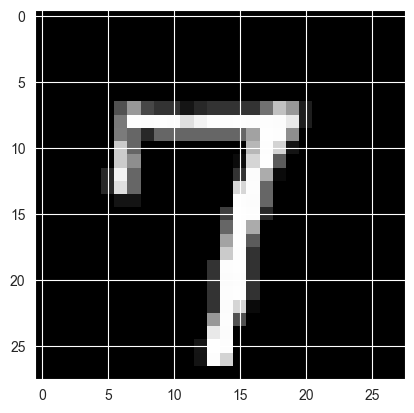

In [61]:
# просмотр изображения из данных
idx = 6
img = data.iloc[idx].to_numpy()[1:].reshape(28, 28)
print(data['label'].iloc[idx])
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Исследовательский анализ данных

In [62]:
# общее количество пропусков по всем данным
print(data.isnull().sum().sum())

0


Пропусков в данных нет, следовательно их не нужно обрабатывать.

In [63]:
# количество объектов каждого класса в данных
data.groupby('label')['pixel0'].count()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: pixel0, dtype: int64

Классы в данных распределены равномерно - модель обучится на каждой группе одинаково.

In [64]:
# вывод статистики по всех столбцам
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


В некоторых факторах, принимаются только 0 значения. Соответсвующее этим факторам пиксели не дают никакой информации. Выведем изображения некоторых чисел, чтобы понять, где эти пиксели находятся и можно ли их убрать.

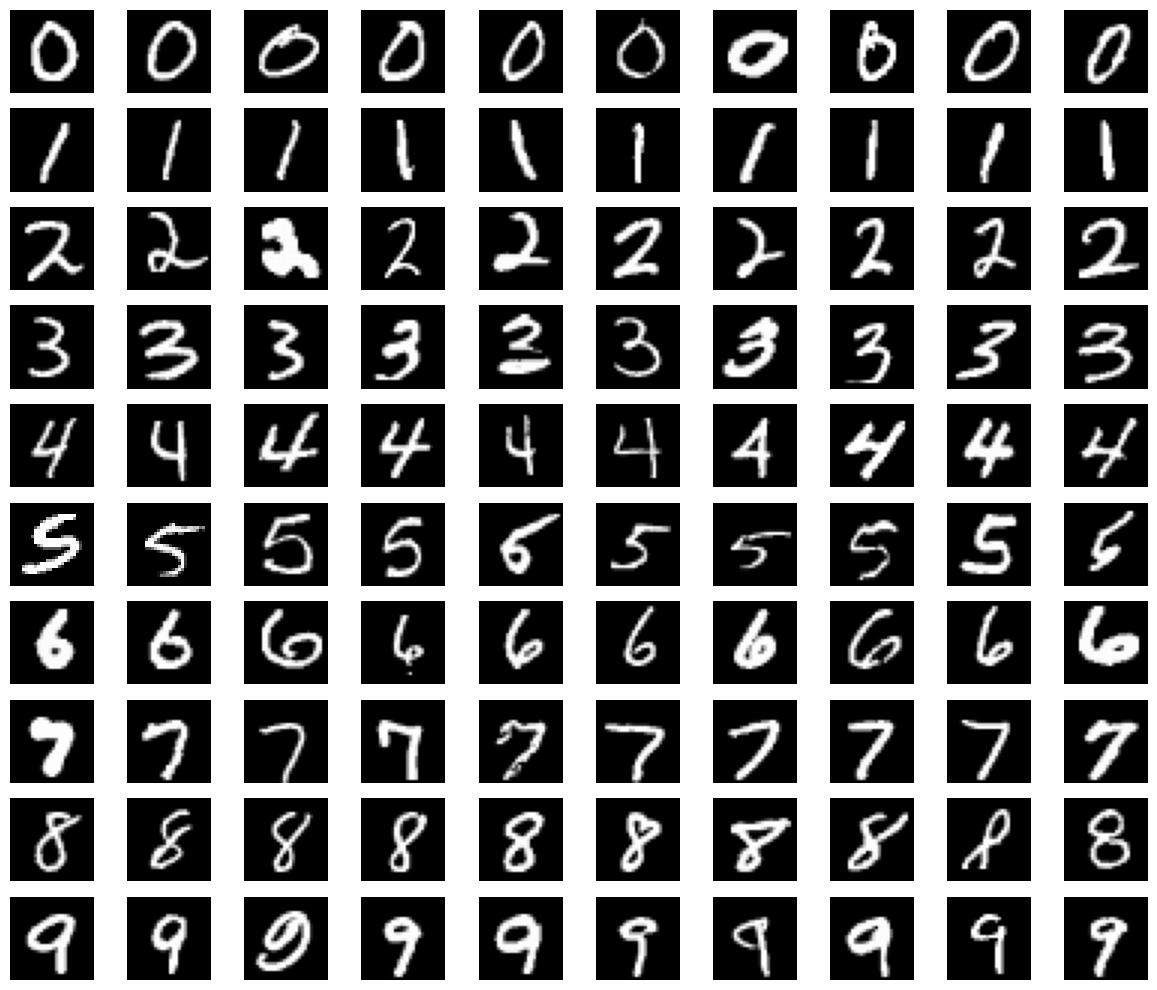

In [101]:
# вывод по 10 изображений каждого класса
fig, axs = plt.subplots(10, 10, figsize=(12, 10))

for label, group in data.groupby('label', as_index=False):
    numbers = group.sample(10, random_state=42).drop(columns='label')
    img_vectors = [x.values.reshape(28, 28) for _, x in numbers.iterrows()]

    for i, img in enumerate(img_vectors):
        axs[label, i].axis('off')
        axs[label, i].imshow(img, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

По изображениям цифр видно, что некоторая часть пикселей по краям не несёт никакой информации. Вероятно получится удалить неинформативные пиксели, что улучшит качество модели.

<Axes: >

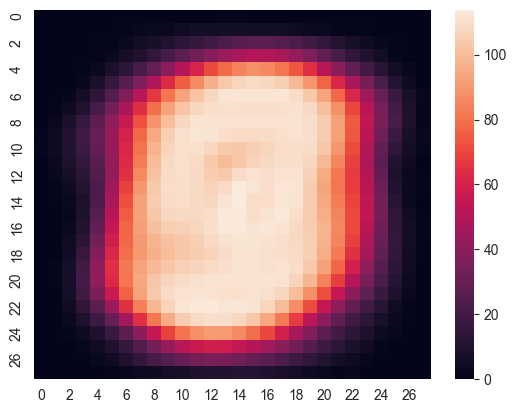

In [66]:
sns.heatmap(data.std()[1:].to_numpy().reshape(28, 28))

За неинформативный пиксель будем пиксели, для которых разброс значений равен нулю. Факторы, соответствующие этим пикселям, можно убрать из данных: в них не содержится никакой информации. По краям есть неинформативный пиксели, которые следует убрать.

# Отбор факторов

In [67]:
from sklearn.feature_selection import VarianceThreshold

# создание объекта для отбора факторов (селектора), который уберёт все колонки с квадратом разброса, не превосходящим 0, и обучение его на данных
selector = VarianceThreshold(threshold=0)
selector.fit(data)

VarianceThreshold(threshold=0)

Чтобы убрать неинформативный пиксели, воспользуемся объектом для отбора факторов из библиотеки `sklearn` - `VarianceThreshold`, который уберёт все колонки с квадратом разброса, не превосходящим заданного значения.

In [68]:
# получение из селектора, названия факторов, которые следует оставить
useful_factors = selector.get_feature_names_out()

In [69]:
len(data.columns)

785

In [70]:
len(useful_factors)

709

In [71]:
# оставляем только "полезные" факторы
useful_data = data.copy(deep=True)[useful_factors]

# Разделение на обучающую и тестовую выборки

In [14]:
# разделяем факторы и предсказываемую характеристику
X = useful_data.drop(columns='label')
y = useful_data['label']

In [15]:
from sklearn.model_selection import train_test_split

# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели

In [16]:
# разделение обучающей выборки на обучающую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Создаём валидационную выборку, чтобы на ней подобрать гиперпараметры модели. Во всем вариациях установим число используемых случайных факторов при формировании каждой вершины каждого дерева, как корень количества всех фактором, и будем оценивать хаотичность критерием Джини.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# создаём модель с числом деревьев - 100 и минимальным количеством объектов в листе - 1
model_100_1 = RandomForestClassifier(n_estimators=100,
                                     min_samples_leaf=1,
                                     max_features='sqrt',
                                     criterion='gini',
                                     random_state=42)

In [18]:
%%time

# обучаем модель
model_100_1.fit(X_train, y_train)

CPU times: total: 13 s
Wall time: 13.2 s


RandomForestClassifier(random_state=42)

In [19]:
# оценивает точность модели на обучающей и валидационной выборке
print(model_100_1.score(X_train, y_train), model_100_1.score(X_val, y_val))

1.0 0.9651785714285714


Модель случайного леса строит заданное число деревьев принятий решений и на основе их прогнозов выдаёт своё предсказание. Так как минимальное количество объектов в листе - 1, модель переобучилась на тестовой выборке и имеет на ней точность 1, но всё равно имеет довольно высокую точность на валидационной выборке.

 Теперь попробуем увеличить количество деревьев модели и посмотрим, как от этого изменится её точность.

In [20]:
# создаём модель с числом деревьев - 500 и минимальным количеством объектов в листе - 1
model_500_1 = RandomForestClassifier(n_estimators=500,
                                     min_samples_leaf=1,
                                     max_features='sqrt',
                                     criterion='gini',
                                     random_state=42)

In [21]:
%%time

# обучаем модель
model_500_1.fit(X_train, y_train)

CPU times: total: 1min 4s
Wall time: 1min 5s


RandomForestClassifier(n_estimators=500, random_state=42)

In [22]:
# оценивает точность модели на обучающей и валидационной выборке
print(model_500_1.score(X_train, y_train), model_500_1.score(X_val, y_val))

1.0 0.9651785714285714


Модель так же переобучилась, но при этом точность модели осталась на таком же уровне, причем цифра в цифру. Увеличилось время обучения примерно в 5 раз, как количество деревьев. Таким образом, эта модель более сложная, но имеет такую же точность, как прошлая.

In [23]:
# создаём модель с числом деревьев - 1000 и минимальным количеством объектов в листе - 1
model_1000_1 = RandomForestClassifier(n_estimators=1000,
                                      min_samples_leaf=1,
                                      max_features='sqrt',
                                      criterion='gini',
                                      random_state=42)

In [24]:
%%time

# обучаем модель
model_1000_1.fit(X_train, y_train)

CPU times: total: 2min 9s
Wall time: 2min 11s


RandomForestClassifier(n_estimators=1000, random_state=42)

In [25]:
# оценивает точность модели на обучающей и валидационной выборке
print(model_1000_1.score(X_train, y_train), model_1000_1.score(X_val, y_val))

1.0 0.9645833333333333


Эта вариация модели тоже переобучилась на тестовой выборке, при этом увеличилось время обучения в 2 раза, как и количество деревьев, но упала точность модели на валидационной выборке, так как структура модели стала более сложной.

Попробуем увеличить минимальное возможное число объектов в листе каждого дерева, чтобы модель перестала переобучаться на тестовой выборке, что может увеличить её качество.

In [26]:
# создаём модель с числом деревьев - 100 и минимальным количеством объектов в листе - 3
model_100_3 = RandomForestClassifier(n_estimators=100,
                                     min_samples_leaf=3,
                                     max_features='sqrt',
                                     criterion='gini',
                                     random_state=42)

In [27]:
%%time

# обучаем модель
model_100_3.fit(X_train, y_train)

CPU times: total: 12 s
Wall time: 12.1 s


RandomForestClassifier(min_samples_leaf=3, random_state=42)

In [28]:
# оценивает точность модели на обучающей и валидационной выборке
print(model_100_3.score(X_train, y_train), model_100_3.score(X_val, y_val))

0.9967261904761905 0.9595238095238096


При увеличении минимального количества объектов в листе у модели почти не заметно уменьшилось точность на тестовой выборке, что говорит о высокой степени переобучения, и упала точность на валидационной выборке по сравнению с прошлыми моделями. Таким образом, минимального количества объектов в листе не даёт модели полностью переобучится на тестовой выборке, но ухудшает качество модели.

Во второй вариации модели с 3 объектами в листе увеличим количество деревьев до 1000, так как в прошлом разницы между 500 и 100 деревьями не было, кроме увеличения времени обучения.

In [29]:
# создаём модель с числом деревьев - 1000 и минимальным количеством объектов в листе - 3
model_1000_3 = RandomForestClassifier(n_estimators=1000,
                                      min_samples_leaf=3,
                                      max_features='sqrt',
                                      criterion='gini',
                                      random_state=42)

In [30]:
%%time

# обучаем модель
model_1000_3.fit(X_train, y_train)

CPU times: total: 1min 59s
Wall time: 2min 1s


RandomForestClassifier(min_samples_leaf=3, n_estimators=1000, random_state=42)

In [31]:
# оценивает точность модели на обучающей и валидационной выборке
print(model_1000_3.score(X_train, y_train), model_1000_3.score(X_val, y_val))

0.9968377976190477 0.9605654761904762


Модель умеет схожую степень переобучения и качество на валидационной выборке немного выросло, но модели с минимальным количеством объектов в листе - 1 имеют более высокую точность с большим переобучением. Это объясняется тем, что деревья в модели случайного леса переобучаются: каждый объект, даже выброс, попадает в лист своего класса. В модели с увеличенный количеством минимальных объектов по итогу обучения в листе не своего класса могут оказаться некоторые объекты. Например, 2 цифры 1 и 3 цифры 7, а разделить группу больше нельзя, для цифр 1 в этом группе будет предсказан класс 7, поэтому точность модели на валидационной выборке снижается.

Создадим ещё вариацию модели с 5 минимальным количеством объектов в листе, но сразу зададим число деревьев равное 1000, так как по прошлой модели это дало более высокую точность.

In [32]:
# создаём модель с числом деревьев - 1000 и минимальным количеством объектов в листе - 5
model_1000_5 = RandomForestClassifier(n_estimators=1000,
                                      min_samples_leaf=5,
                                      max_features='sqrt',
                                      criterion='gini',
                                      random_state=42)

In [33]:
%%time

# обучаем модель
model_1000_5.fit(X_train, y_train)

CPU times: total: 1min 54s
Wall time: 1min 55s


RandomForestClassifier(min_samples_leaf=5, n_estimators=1000, random_state=42)

In [34]:
# оценивает точность модели на обучающей и валидационной выборке
print(model_1000_5.score(X_train, y_train), model_1000_5.score(X_val, y_val))

0.991108630952381 0.9583333333333334


Модель чуть-чуть слабее переобучилась, но имеют ещё более низкую точность на валидационной выборке по сравнению с `model_1000_3`.

Таким образом, лучшая модель - это `model_100_1` (100 деревьев и минимальным количеством объектов в листе - 1), так как умеет самую высокую точность и более простую структуру.

In [37]:
from sklearn.metrics import f1_score

# вычисляем вектор предсказанных значений
y_pred = model_100_1.predict(X_val)

In [38]:
# качество модели по метрики F1-score
f1_score(y_val, y_pred, average='micro')

0.9651785714285714

Качество модели по метрике F1-score равна 0.965, что является очень хорошим показателем.

Посмотрим в каких случаях модель ошибается. В общем случае подобный анализ может помочь понять, как нужно изменить модель машинного обучения, чтобы она стала работать лучше.

In [42]:
# добавление к факторам колонки с предсказываемым значением и выданное моделью предсказание
X_y_val = X_val.copy(deep=True)
X_y_val['y'] = y_val
X_y_val['y_pred'] = y_pred

In [104]:
# таблица со строками, где модель ошиблась
errors = X_y_val[X_y_val['y'] != X_y_val['y_pred']]

In [51]:
# вывод количества пар реальное - предсказываемое значения по таблице с ошибками
errors.groupby(['y', 'y_pred'], as_index=False).agg({'pixel100': 'count'}).sort_values('pixel100', ascending=False).head(10)

,y,y_pred,pixel100
28,4,9,12
16,3,2,11
54,8,9,11
47,7,9,11
59,9,4,11
62,9,7,10
21,3,8,9
45,7,4,8
26,4,6,6
63,9,8,6


Модель чаще всего ошиблась при классификации цифры 4 в пользу 9. Посмотрим на эти изображения, чтобы можно было предположить с чем связаны не правильные предсказания.

In [105]:
# индексы строк, в которых модель чаще всего ошиблась
error_idx = errors[(errors['y'] == 4) & (errors['y_pred'] == 9)].index

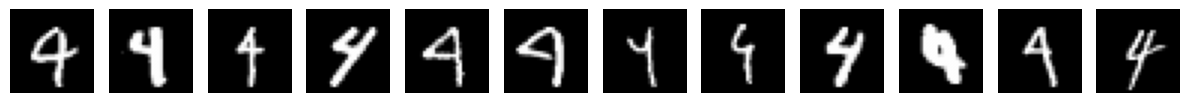

In [103]:
# вывод изображений цифр 4, при классификации которых модель их отнесла к 9
fig, axes = plt.subplots(1, 12, figsize=(12, 2))

for ax, (_, row) in zip(axes, data.loc[error_idx].iterrows()):
    ax.axis('off')
    ax.imshow(row.drop('label').to_numpy().reshape(28, 28), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()